### Задание 1

Получить интуицию, на что влияют параметры распределений. Построить по 5 функций плотностей с разными параметрами для каждого распределения: нормальное, экспоненциальное, Стьюдента на одном графике.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics
import math

%matplotlib inline

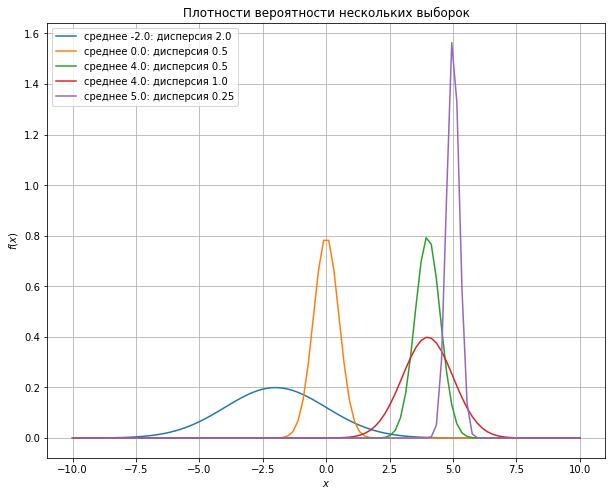

In [2]:
# Нормальное распределение 
mu = [-2.0, 0.0, 4.0, 4.0, 5.0]
sigma = [2.0, 0.5, 0.5, 1.0, 0.25]

x = np.linspace(-10,10,100)
plt.figure(figsize=(10,8))

# зададим нормально распределенную случайную величину
for i in range(len(mu)):
    norm_rv = sts.norm(loc=mu[i], scale=sigma[i])
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf)

plt.legend(['среднее -2.0: дисперсия 2.0',  'среднее 0.0: дисперсия 0.5', 'среднее 4.0: дисперсия 0.5', 
            'среднее 4.0: дисперсия 1.0', 'среднее 5.0: дисперсия 0.25'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('Плотности вероятности нескольких выборок')
plt.grid(True)

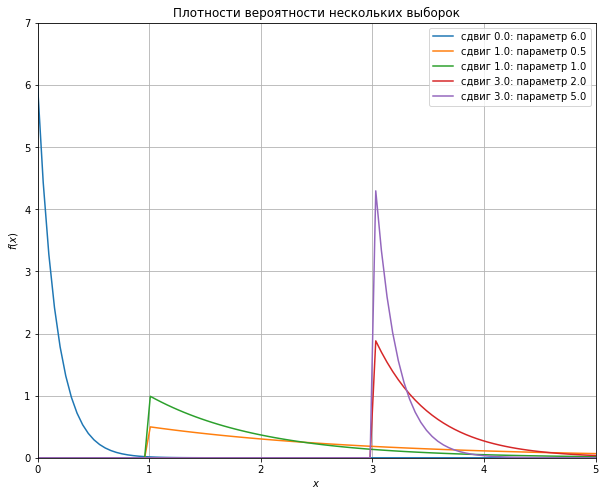

In [3]:
# Экспоненциальное распределение
lam = [6.0, 0.5, 1.0, 2.0, 5.0]
pts = [0.0, 1.0, 1.0, 3.0, 3.0]

x = np.linspace(0.0, 5.0, 100)
plt.figure(figsize=(10,8))

# зададим экспоненциально распределенную случайную величину
for i in range(len(lam)):
    expon_rv = sts.expon(loc = pts[i],  scale = 1.0/lam[i])
    pdf = expon_rv.pdf(x)
    plt.plot(x, pdf)

plt.legend(['сдвиг 0.0: параметр 6.0', 'сдвиг 1.0: параметр 0.5', 'сдвиг 1.0: параметр 1.0', 
            'сдвиг 3.0: параметр 2.0', 'сдвиг 3.0: параметр 5.0'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('Плотности вероятности нескольких выборок')
plt.xlim(0,5)
plt.ylim(0,7)
plt.grid(True)

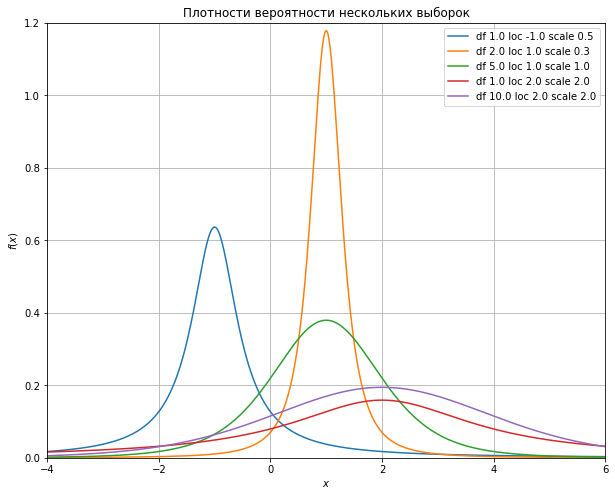

In [4]:
# Стьюдента распределение
sc_ = [0.5, 0.3, 1.0, 2.0, 2.0]
pts = [-1.0, 1.0, 1.0, 2.0, 2.0]
df_ = [1.0, 2.0, 5.0, 1.0, 10.0]

x = np.linspace(-4.0, 6.0, 1000)
plt.figure(figsize=(10,8))

# зададим экспоненциально распределенную случайную величину
for i in range(len(lam)):
    t_rv = sts.t(df = df_[i], loc = pts[i],  scale = sc_[i])
    pdf = t_rv.pdf(x)
    plt.plot(x, pdf)

plt.legend(['df 1.0 loc -1.0 scale 0.5', 'df 2.0 loc 1.0 scale 0.3', 'df 5.0 loc 1.0 scale 1.0', 
            'df 1.0 loc 2.0 scale 2.0', 'df 10.0 loc 2.0 scale 2.0'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('Плотности вероятности нескольких выборок')
plt.xlim(-4,6)
plt.ylim(0,1.2)
plt.grid(True)

### Задание 2

Непрерывная случайная величина задана плотностью распределения:
$$ f(\xi) = C, \xi \in [0;5];f(\xi) = 0, \xi \notin [0;5]$$
Найдите C, математическое ожидание $\xi$ а также вероятность попадания $\xi$ в отрезок $[3.5;7]$, т.е. $P(3.5<\xi<7)$.

https://ru.overleaf.com/learn/latex/Integrals,_sums_and_limits

$$ f(x) = C, x \in [0;5];f(x) = 0, x \notin [0;5]$$
Для любой плотности распределения выполняется следующее условие: $$\int\limits^{+\infty}_{-\infty} f(x)\,dx=1$$

У нас равномерное распределение на отрезке $[0;5]$. Следовательно проинтегрировав нашу функцию можно получить, что $C = 1 / 5.$

Математическое ожидание:
$$Mx=\int\limits^{+\infty}_{-\infty} f(x)x\,dx$$
$$Mx=\frac{1}{5}\int\limits^{5}_{0} x\,dx$$
$$Mx=\frac{1}{5}\frac{x^2}{2}\bigg|_0^5 = 2.5$$

Вполне очевидный ответ, для равномерного распределения. Математическое ожидание оказалось "посередине отрезка".

Вероятность попадания в отрезок$$[3.5;7]$$равна $$P(x \in [3,5;7])=\int\limits^{7}_{3.5} f(x)\,dx=1$$

$$P = 0.3$$

### Задание 3
Известно, что светофор горит 54 секунды красным, 4 секунды жёлтым и 28 секунд зелёным. Посчитайте, какое количество информации несёт сообщение о цвете светофора в текущий момент. А что будет в случае 28, 28 и 28 секунд для каждого цвета?

In [5]:
def entropy(r, y, g):

    time = r + y + g

    pr = r/time
    py = y/time
    pg = g/time

    entr = -math.log2(pr)
    enty = -math.log2(py)
    entg = -math.log2(pg)
    
    return (entr, enty, entg)

In [8]:
entropy(54,4,28)

(0.6713772525386293, 4.426264754702098, 1.6189098326444937)

In [10]:
entropy(28,28,28)

(1.5849625007211563, 1.5849625007211563, 1.5849625007211563)